In [1]:
include("benchFunctions.jl")
using PrettyTables

In [2]:
fp32 = true

if fp32
    println("Using Float32 data")
    example_filepath = "resuts_adjoint_GH200_f32.csv";
else
    println("Using Float64 data")
    example_filepath = "resuts_adjoint_GH200_f64.csv";
end


my_df = read_special_csv(example_filepath);


# println("DataFrame letto con successo:")
# println(my_df)

# required_cols = ["cluster_size", "tet_per_block", "nelements", "clock", "Throughput"]
# missing_cols = setdiff(required_cols, names(my_df))

# println("Colonne richieste mancanti: ", missing_cols)
# println("Colonne presenti nel DataFrame: ", names(my_df))

# grouped = groupby(my_df, [:cluster_size, :tet_per_block])


Using Float32 data


Top 20 rows with maximum Throughput:




Row,cluster_size,tet_per_block,min_clock,max_clock,mean_clock,se_clock,ci90_clock,min_Throughput,max_Throughput,mean_Throughput,se_Throughput,ci90_Throughput
,Int64,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,1,4,0.153991,0.156251,0.154588,0.000195453,0.000358287,1.59632e8,1.61974e8,1.61351e8,2.0238e5,370986.0
2,8,4,0.154117,0.156648,0.154978,0.000239128,0.000438348,1.59227e8,1.61842e8,1.60946e8,247199.0,4.53144e5
3,4,4,0.150586,0.159856,0.155795,0.000917152,0.00168124,1.56032e8,1.65637e8,1.60149e8,9.47147e5,1.73623e6
4,12,4,0.156965,0.159206,0.157705,0.000220514,0.000404226,1.56669e8,1.58905e8,1.58163e8,2.20334e5,4.03898e5
5,4,6,0.159235,0.160917,0.159733,0.000145552,0.000266813,1.55003e8,1.5664e8,1.56153e8,1.41591e5,2.59551e5
6,16,4,0.160853,0.163682,0.162358,0.000306605,0.000562042,1.52384e8,1.55064e8,1.53632e8,290321.0,5.32191e5
7,8,6,0.161188,0.163894,0.162604,0.000242085,0.000443769,1.52187e8,1.54742e8,1.53398e8,228490.0,4.18848e5
8,1,6,0.163218,0.165091,0.163592,0.000170815,0.000313122,1.51084e8,1.52817e8,1.5247e8,1.57999e5,2.89629e5
9,12,6,0.166805,0.169103,0.167694,0.000227335,0.00041673,1.475e8,1.49532e8,1.48742e8,2.01219e5,3.68856e5


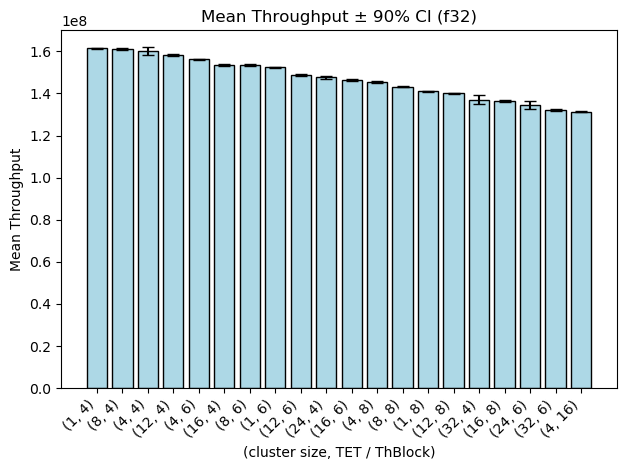

In [3]:

summary_df = summarize_cluster_stats(my_df);
max_row = col_with_max_Throughput(summary_df);

top = 20
max_row_top = cols_within_max_Throughput(summary_df, top);


println("Top $top rows with maximum Throughput:\n\n");
show(stdout, MIME("text/html"), max_row_top);


picture_th = plot_throughput_bars(max_row_top, logy = false, fpFormat = fp32 ? 32 : 64);


In [4]:
summary_df = summarize_cluster_stats(my_df)
println("Cluster stats summary:")
println(summary_df)

Cluster stats summary:
65×12 DataFrame
 Row │ cluster_size  tet_per_block  min_clock  max_clock  mean_clock  se_clock     ci90_clock   min_Throughput  max_Throughput  mean_Throughput  se_Throughput   ci90_Throughput 
     │ Int64         Int64          Float64    Float64    Float64     Float64      Float64      Float64         Float64         Float64          Float64         Float64         
─────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │            1              4   0.153991   0.156251    0.154588  0.000195453  0.000358287       1.59632e8       1.61974e8        1.61351e8       2.0238e5    370986.0
   2 │            1              6   0.163218   0.165091    0.163592  0.000170815  0.000313122       1.51084e8       1.52817e8        1.5247e8        1.57999e5        2.89629e5
   3 │            1              8   0.176484   0.178641    0.176834  0.0002035

In [5]:
# Read specific files
filepaths = ["hex_125.csv", "hex_250.csv", "hex_500.csv"]
data = read_level_csvs(filepaths)

# Combine all data into single DataFrame
combined_df = combine_level_data(data)

data

Dict{String, DataFrame} with 3 entries:
  "hex_125.csv" => 10×2 DataFrame…
  "hex_250.csv" => 20×2 DataFrame…
  "hex_500.csv" => 20×2 DataFrame…

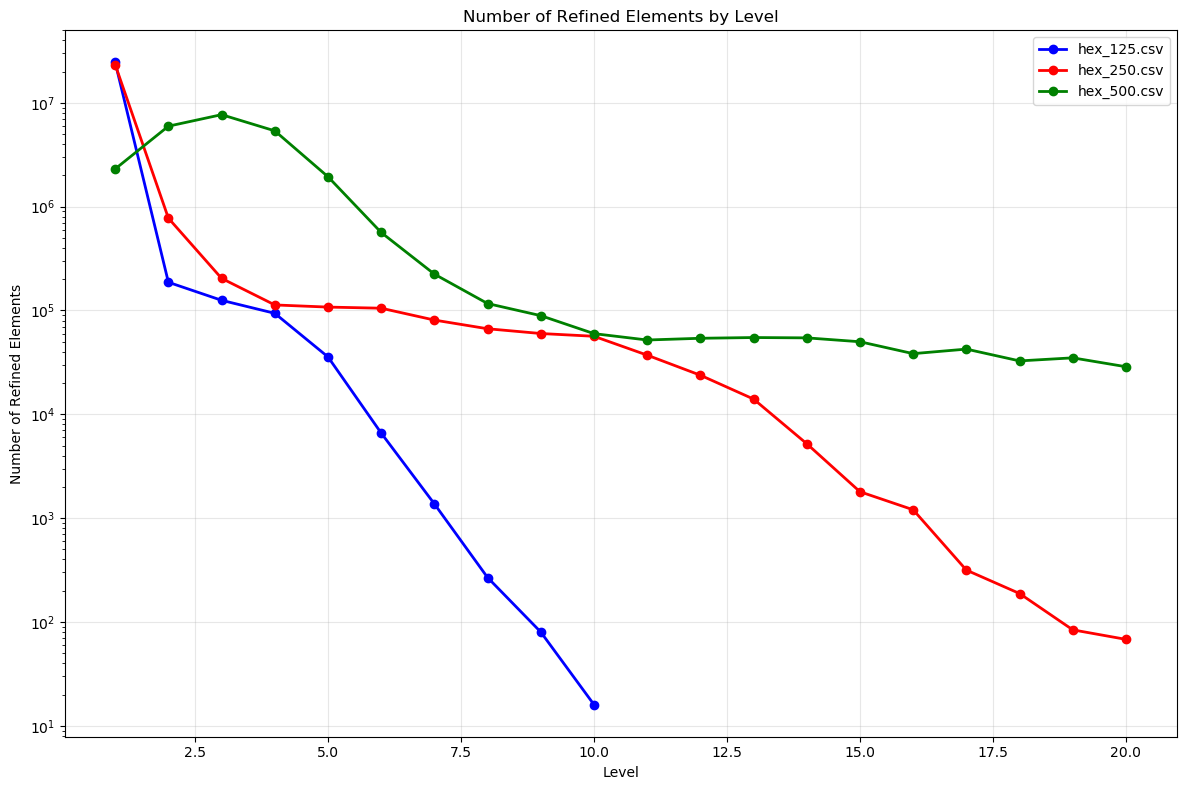

In [6]:
# # Create the 3x1 histogram plot
# hist_fig = plot_level_histograms(data)

# Optional: Create a line plot showing elements vs level
line_fig = plot_elements_by_level(data);
